#**Deep Learning Homework 3: Convolutional Neural Networks**

### MSc Computer Science, Data Science, Cybersecurity @UniPD
### 2nd semester - 6 ECTS
### Prof. Nicolò Navarin & Prof. Alessandro Sperduti
---
In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the CIFAR-10 dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: CIFAR-10 dataset


We will use the CIFAR-10 dataset.The dataset consists of 60000 images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Each sample is a 32x32 pixels color image, associated with a label from 10 classes:

```
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
```

Each pixel intensity is represented by a `uint8` (byte) from 0 to 255.
We will divide the dataset in training, testing and validation set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one and in color images is 3). Therefore, if you are using grayscale images use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims#:~:text=Used%20in%20the%20notebooks,-Used%20in%20the&text=This%20operation%20is%20useful%20to,to%20a%20tensor%20of%20scalars) to transform each image from a matrix to a 3-dimensional tensor. Finally, we have to normalize the input data.

In [ ]:
cifar_10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = (
    cifar_10.load_data()) # The dataset is already divede in test and training

# We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


Let's take a look at a sample of the images in the dataset:

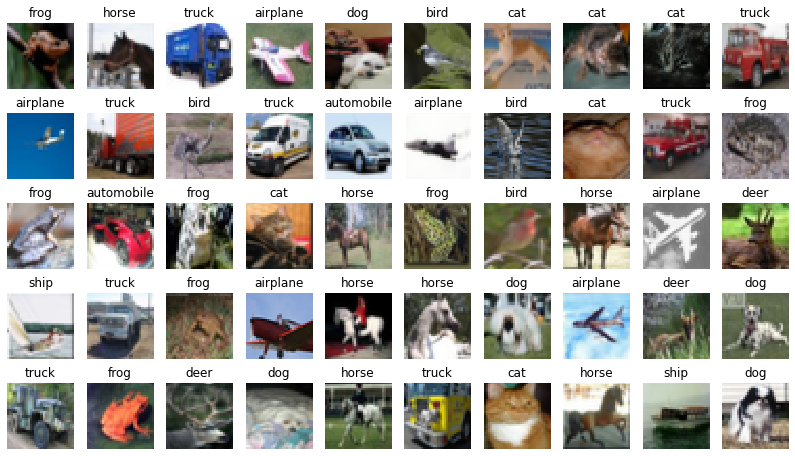

In [ ]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [ ]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)


std_train = np.std(X_train, axis=0)
mean_train = np.mean(X_train, axis=0)
X_train = (X_train - mean_train) / std_train
X_valid = (X_valid - mean_train) / std_train
X_test = (X_test - mean_train) / std_train


#Add one dimension to manage the channel if you are using grayscale images.
# X_train=tf.expand_dims(X_train, 3) 
# X_valid=tf.expand_dims(X_valid, 3) 
# X_test=tf.expand_dims(X_test,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


Print the model summary

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 8192)              0         
                                                                 
 dense_8 (Dense)             (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
352/352 [==============================] - 31s 88ms/step - loss: 1.4350 - accuracy: 0.4994 - val_loss: 1.2118 - val_accuracy: 0.5800
Epoch 2/10
352/352 [==============================] - 30s 85ms/step - loss: 1.1358 - accuracy: 0.6069 - val_loss: 1.1004 - val_accuracy: 0.6172
Epoch 3/10
352/352 [==============================] - 30s 86ms/step - loss: 1.0233 - accuracy: 0.6467 - val_loss: 1.0718 - val_accuracy: 0.6318
Epoch 4/10
352/352 [==============================] - 31s 89ms/step - loss: 0.9523 - accuracy: 0.6727 - val_loss: 1.0458 - val_accuracy: 0.6462
Epoch 5/10
352/352 [==============================] - 30s 85ms/step - loss: 0.9013 - accuracy: 0.6896 - val_loss: 1.0334 - val_accuracy: 0.6442
Epoch 6/10
352/352 [==============================] - 30s 85ms/step - loss: 0.8615 - accuracy: 0.7047 - val_loss: 1.0295 - val_accuracy: 0.6538
Epoch 7/10
352/352 [==============================] - 31s 88ms/step - loss: 0.8279 - accuracy: 0.7158 - val_loss: 0.9938 - val_accuracy:

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 4s - loss: 1.0434 - accuracy: 0.6468 - 4s/epoch - 12ms/step
accuracy: 64.68%


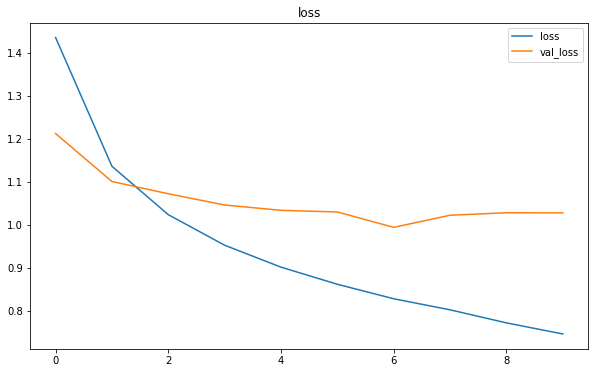

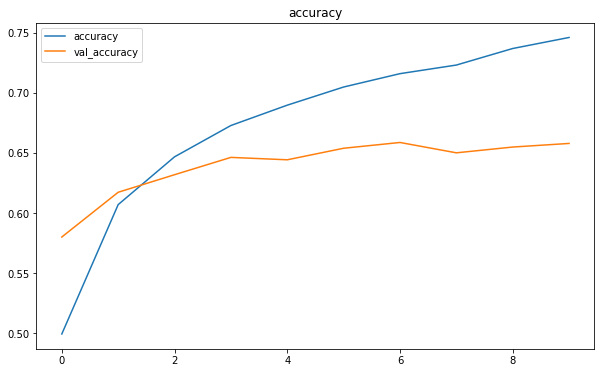

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'], label='loss')
  plt.plot(history.epoch,history.history['val_loss'],label='val_loss')
  plt.title('loss')
  plt.legend()
  
def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'],label='accuracy')
  plt.plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
  plt.title('accuracy')
  plt.legend()
  
plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

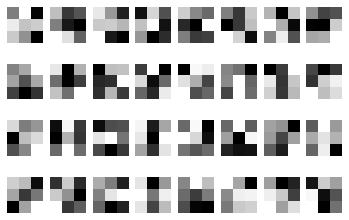

In [ ]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 10)               

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1.   The number of parameters on each layer Conv2D are: output_channels (input_channels kernel_size * kernel_height * kernel_width + 1) the 1 is for the bias.
2.   Because the kernal and filters in each convolutional layers differ, the number of parameters varies.

Let's now train our deep CNN.

Epoch 1/10
352/352 [==============================] - 34s 96ms/step - loss: 1.6230 - accuracy: 0.4211 - val_loss: 1.3626 - val_accuracy: 0.5156
Epoch 2/10
352/352 [==============================] - 33s 94ms/step - loss: 1.2917 - accuracy: 0.5458 - val_loss: 1.2326 - val_accuracy: 0.5638
Epoch 3/10
352/352 [==============================] - 33s 94ms/step - loss: 1.1922 - accuracy: 0.5845 - val_loss: 1.1644 - val_accuracy: 0.5914
Epoch 4/10
352/352 [==============================] - 34s 98ms/step - loss: 1.1177 - accuracy: 0.6102 - val_loss: 1.1227 - val_accuracy: 0.6110
Epoch 5/10
352/352 [==============================] - 34s 95ms/step - loss: 1.0639 - accuracy: 0.6308 - val_loss: 1.0639 - val_accuracy: 0.6326
Epoch 6/10
352/352 [==============================] - 34s 96ms/step - loss: 1.0200 - accuracy: 0.6471 - val_loss: 1.0264 - val_accuracy: 0.6472
Epoch 7/10
352/352 [==============================] - 35s 99ms/step - loss: 0.9901 - accuracy: 0.6583 - val_loss: 1.0029 - val_accuracy:

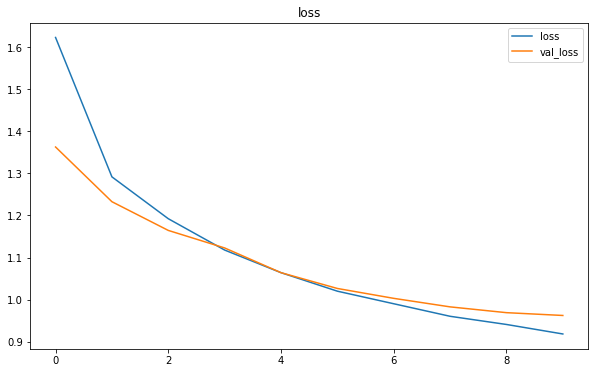

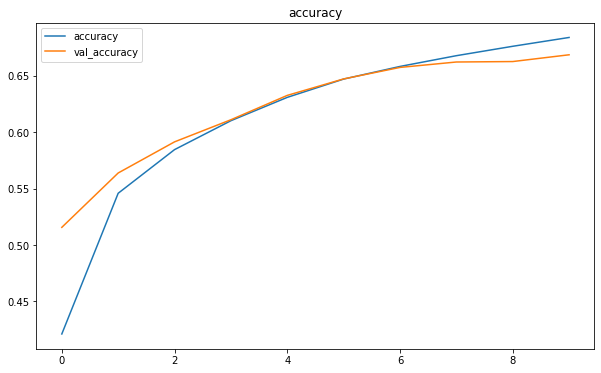

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_15 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_16 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                     

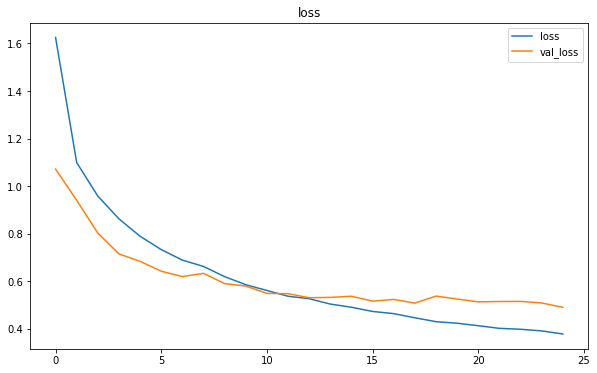

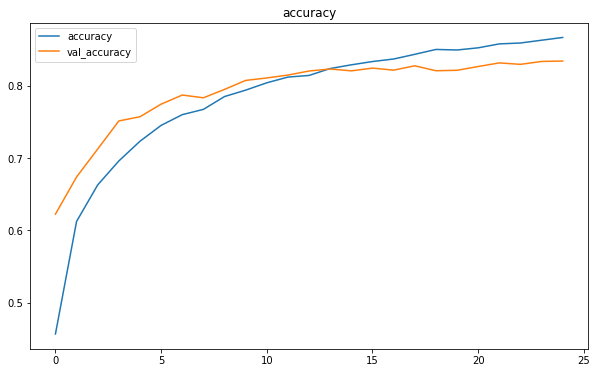

In [ ]:



model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Dropout(0.25),
    
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Dropout(0.25),
    

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(10, activation="softmax")

  ])

model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
  
print(model.summary())

history = model.fit(X_train, y_train, epochs=25, batch_size=32,validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


### [TO COMPLETE] Example of tests discussion
The best model that I found 

A convolutional (Conv2D) layer with 32 3x3 filters

A max-pooling (MaxPool2D) layer with a 2x2 filter size.

Another convolutional (Conv2D) layer, this time with 16 3x3 filters.

A dropout layer with a rate of 0.25

A dense (completely linked) layer of 512 neurons with ReLU activation function Another dropout layer with a rate of 0.5

The last fully-connected (Dense) layer, with ten outputs and softmax as an activation method.


The achieved accuracy in the test set is 82.66%

Discussion:
After a series of testing with various parameters, the above model appears to be the best match without overfitting.

Besides, I tested also other models: 
* I changed one parameter at a time, beginning with the number of layers and progressing through the activation function and optimizers to the batch sizes. The greatest results I got were with various optimizers, epochs, activation functions, and batch sizes, so I had to mediate between them to get my best model.

* I discovered that decreasing batch sizes and deleting the maxpool layer resulted in a sawtooth trend on the graph. So, in the end, I settled on 32 as the batch size.

* Small batch sizes with a higher epoch count have a modest tendency to overfit (loss on train improves while validation stationates at a value after 10 epochs). The same thing happened with larger filters on both convolutional layers (but in this case accuracy on test set slightly improves in respect to mymodel).

Adam, nadam, adamax, and rmsprop were the best optimizers I tried.

Discussion:
Because of the longer run period, the above study lacks an adequate comparison model. When the model is tested with multiple optimizers, epochs, activation functions, and batch sizes, there is only a 0.7 variation in accuracy.